하이퍼 매개변수 최적화에 걸린 시간은 798.8203740119934 초 입니다.


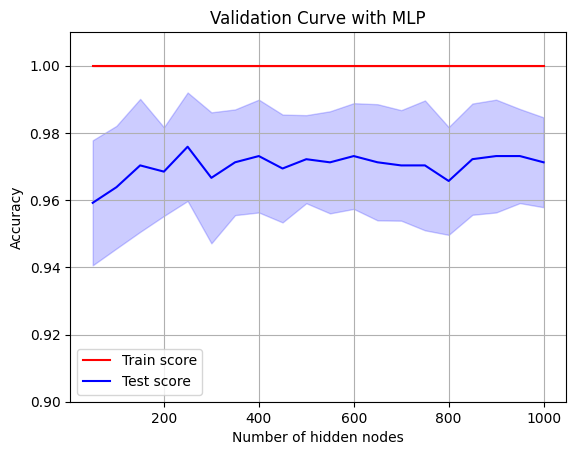


최적의 은닉층 노드 개수는 250 개 입니다.

[[71.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 67.  0.  0.  0.  0.  0.  0.  3.  0.]
 [ 0.  0. 68.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0. 86.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 80.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. 67.  2.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0. 69.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 67.  0.  1.]
 [ 0.  2.  0.  0.  0.  0.  1.  1. 54.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 70.]]
테스트 집합에 대한 정확률은 97.2183588317107 % 입니다.


In [2]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, validation_curve
import numpy as np
import matplotlib.pyplot as plt
import time

digit = datasets.load_digits()
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target,train_size = 0.6)

start = time.time()
mlp = MLPClassifier(learning_rate_init = 0.001, batch_size = 32, max_iter = 300, solver = 'sgd')
prange = range(50, 1001, 50)
train_score, test_score = validation_curve(mlp, x_train, y_train, param_name = 'hidden_layer_sizes',
                                           param_range=prange, cv=10, scoring='accuracy')

end = time.time()
print('하이퍼 매개변수 최적화에 걸린 시간은',end-start,'초 입니다.')

train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

plt.plot(prange, train_mean, label='Train score', color = 'r')
plt.plot(prange, test_mean, label='Test score', color = 'b')
plt.fill_between(prange, train_mean-train_std, train_mean + train_std, alpha = 0.2, color = 'r')
plt.fill_between(prange, test_mean-test_std, test_mean + test_std, alpha = 0.2, color = 'b')
plt.legend(loc='best')
plt.title('Validation Curve with MLP')
plt.xlabel('Number of hidden nodes'); plt.ylabel('Accuracy')
plt.ylim(0.9, 1.01)
plt.grid(axis='both')
plt.show()

best_number_nodes = prange[np.argmax(test_mean)]
print('\n최적의 은닉층 노드 개수는',best_number_nodes,'개 입니다.\n')

mlp_test = MLPClassifier(hidden_layer_sizes = (best_number_nodes), learning_rate_init=0.001, batch_size = 32, max_iter = 300, solver='sgd')
mlp_test.fit(x_train, y_train)

res = mlp_test.predict(x_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
    conf[res[i]][y_test[i]]+=1
print(conf)

no_correct = 0
for i in range(10):
    no_correct += conf[i][i]
accuracy = no_correct/len(res)
print('테스트 집합에 대한 정확률은',accuracy*100,'% 입니다.')